In [3]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image


source_dir = './originalData/train'  
target_base = 'data'      

splits = ['train', 'val', 'test']
split_ratios = [0.7, 0.15, 0.15]

for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    files = os.listdir(class_path)
    random.shuffle(files)

    total = len(files)
    train_end = int(split_ratios[0] * total)
    val_end = train_end + int(split_ratios[1] * total)

    split_files = {
        'train': files[:train_end],
        'val': files[train_end:val_end],
        'test': files[val_end:]
    }

    for split in splits:
        split_dir = os.path.join(target_base, split, class_name)
        os.makedirs(split_dir, exist_ok=True)
        for file in split_files[split]:
            src = os.path.join(class_path, file)
            dst = os.path.join(split_dir, file)
            shutil.copy2(src, dst)


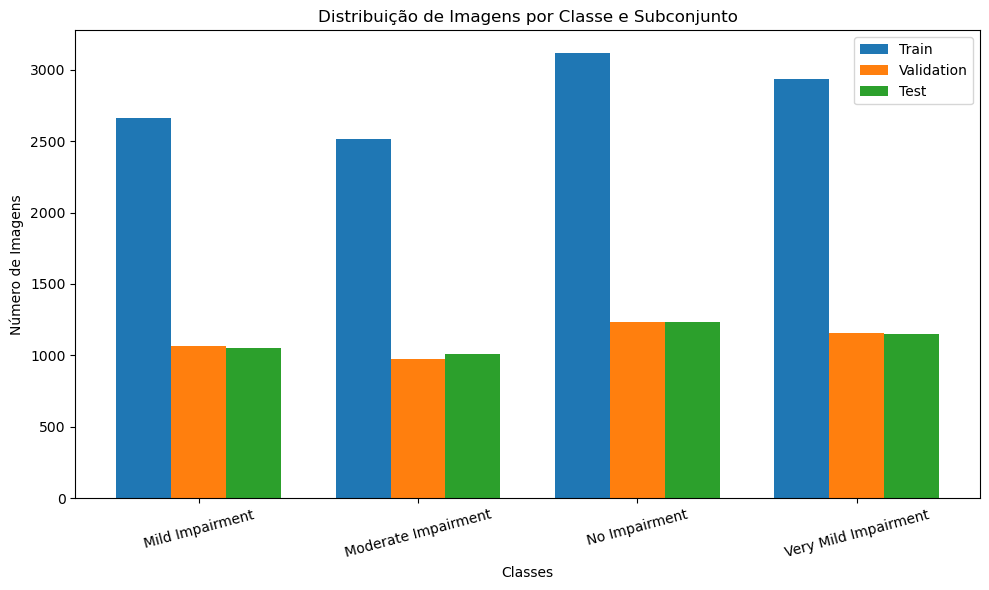

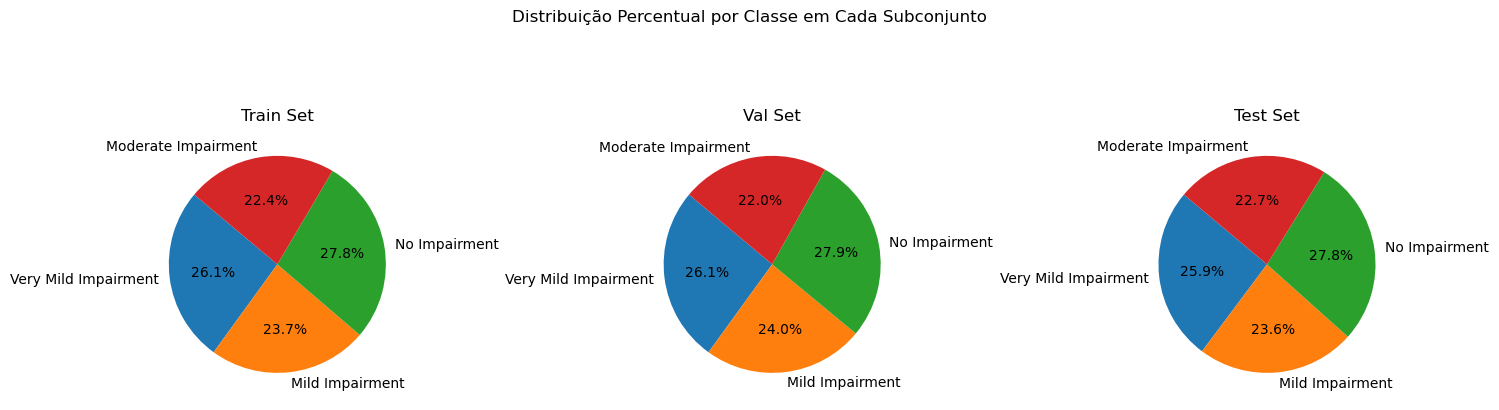

In [9]:

base_path = "./data" 

data_counts = {
    "train": defaultdict(int),
    "val": defaultdict(int),
    "test": defaultdict(int)
}

for subset in data_counts.keys():
    subset_path = os.path.join(base_path, subset)
    for label in os.listdir(subset_path):
        label_path = os.path.join(subset_path, label)
        count = len(os.listdir(label_path))
        data_counts[subset][label] = count

labels = sorted(list(data_counts["train"].keys()))
x = range(len(labels))
bar_width = 0.25

train_counts = [data_counts["train"][label] for label in labels]
val_counts = [data_counts["val"][label] for label in labels]
test_counts = [data_counts["test"][label] for label in labels]

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width for i in x], train_counts, width=bar_width, label='Train')
plt.bar(x, val_counts, width=bar_width, label='Validation')
plt.bar([i + bar_width for i in x], test_counts, width=bar_width, label='Test')

plt.xlabel("Classes")
plt.ylabel("Número de Imagens")
plt.title("Distribuição de Imagens por Classe e Subconjunto")
plt.xticks(ticks=x, labels=labels, rotation=15)
plt.legend()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, subset in enumerate(["train", "val", "test"]):
    counts = data_counts[subset]
    axes[i].pie(
        counts.values(),
        labels=counts.keys(),
        autopct='%1.1f%%',
        startangle=140
    )
    axes[i].set_title(f"{subset.capitalize()} Set")

plt.suptitle("Distribuição Percentual por Classe em Cada Subconjunto")
plt.tight_layout()
plt.show()


rogosidade, luminosidade, contornos, areas
ferrramentas de processamento de imagem médica ( python, kaggle, ...)
para nos dar as features

CNN ESTUDAR AS CAMADAS E VER OQ ELAS ESTAO A FAZER
neurokit
machine learning com estas features vs deep learning


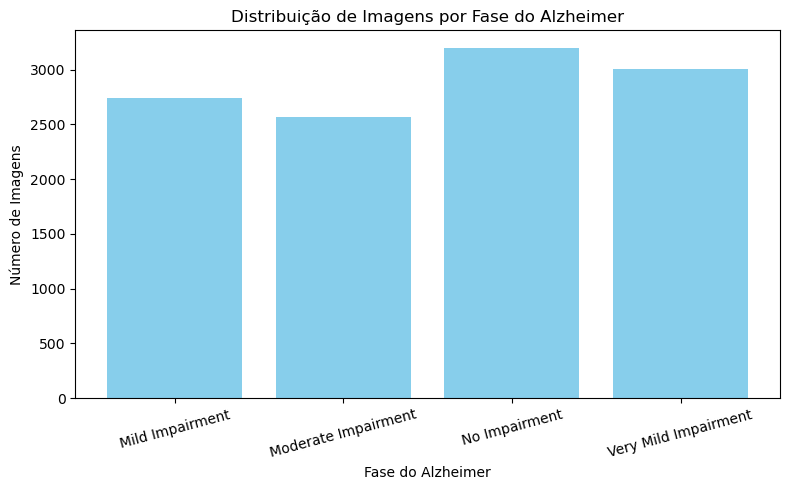

In [14]:

dataset_path = "./originalData/train"  

class_counts = {}
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        n_images = len([img for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_name] = n_images

class_counts = dict(sorted(class_counts.items()))

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Fase do Alzheimer")
plt.ylabel("Número de Imagens")
plt.title("Distribuição de Imagens por Fase do Alzheimer")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


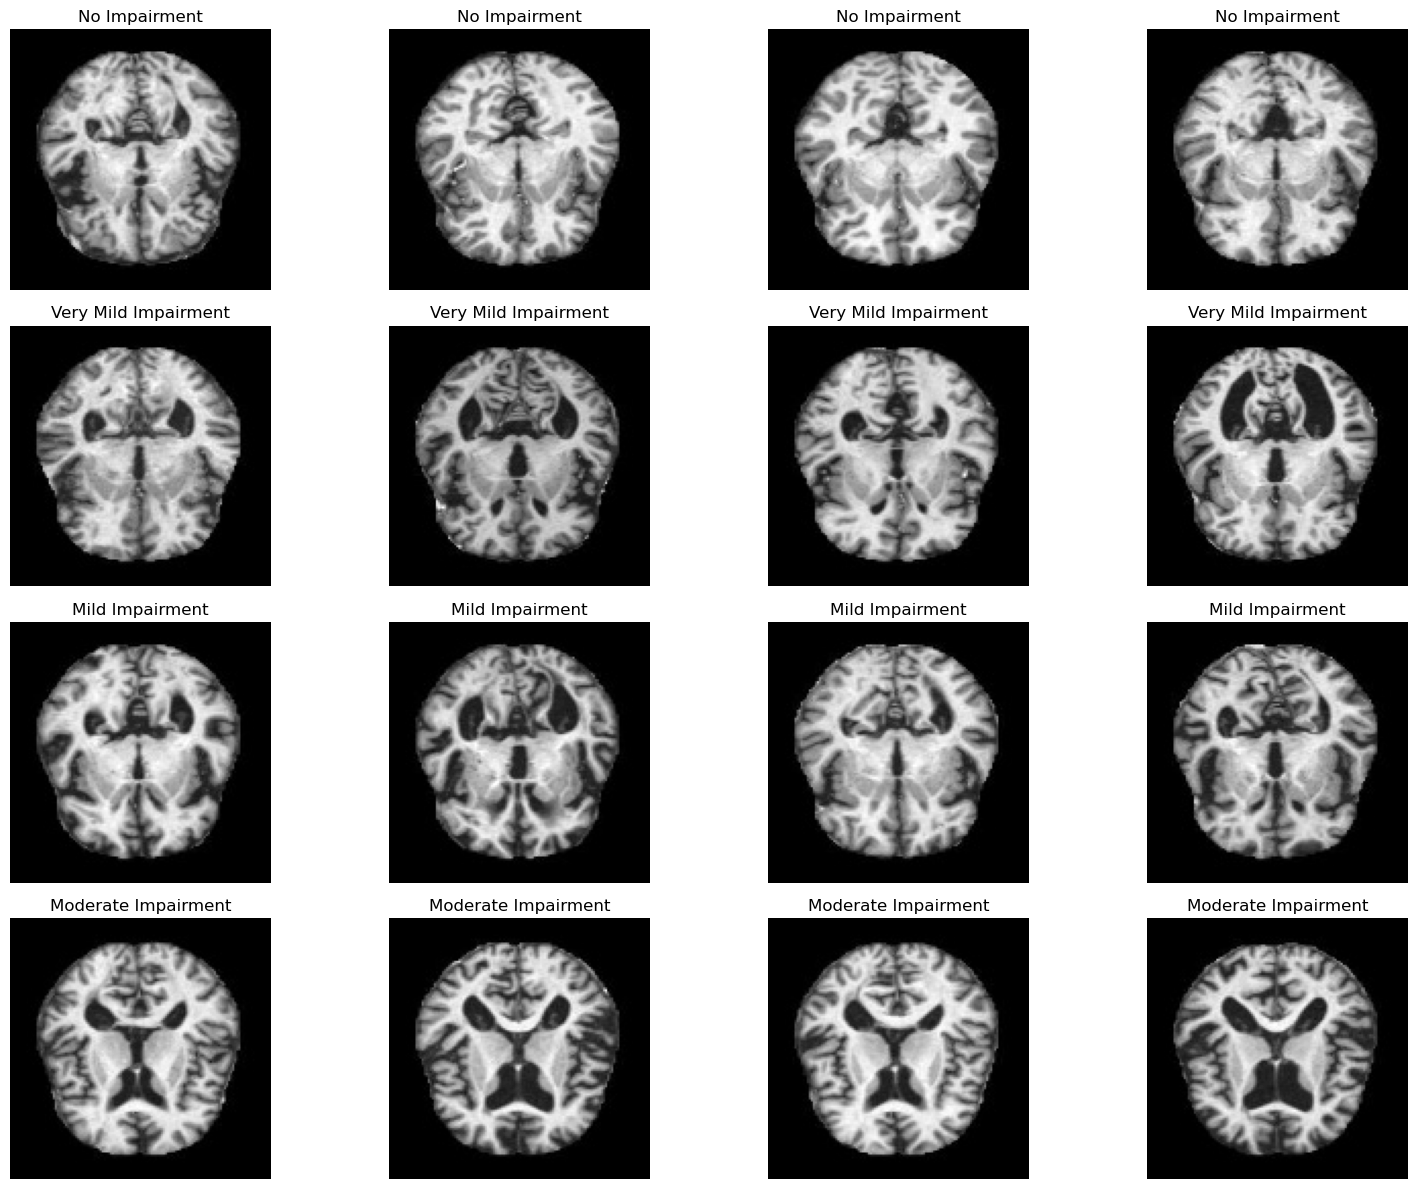

In [18]:

dataset_path = "./originalData/train" 

ordered_classes = [
    "No Impairment",          
    "Very Mild Impairment",   
    "Mild Impairment",        
    "Moderate Impairment"     
]

available_classes = os.listdir(dataset_path)
classes = [cls for cls in ordered_classes if cls in available_classes]

n_images = 4

plt.figure(figsize=(n_images * 4, len(classes) * 3))
img_index = 1

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    images = sorted([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

    for i in range(min(n_images, len(images))):
        img_path = os.path.join(class_path, images[i])
        try:
            img = Image.open(img_path)
            plt.subplot(len(classes), n_images, img_index)
            plt.imshow(img, cmap='gray')
            plt.title(cls)
            plt.axis('off')
            img_index += 1
        except Exception as e:
            print(f"Erro ao abrir imagem {img_path}: {e}")

plt.tight_layout()
plt.show()



📐 Tamanhos de imagem (largura x altura):
(128, 128): 11519 imagens

🎨 Modos de cor encontrados:
L: 11519 imagens

📊 Número de imagens por classe:
Mild Impairment: 2739
Moderate Impairment: 2572
No Impairment: 3200
Very Mild Impairment: 3008


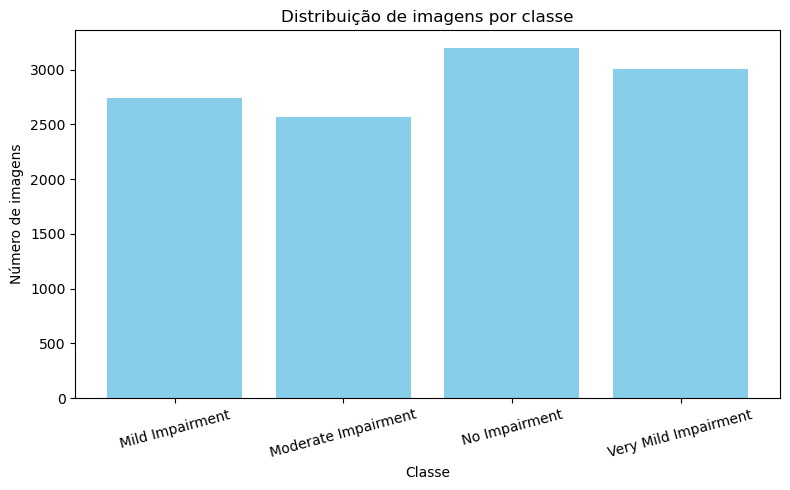

In [20]:

dataset_path = "./originalData/train"

image_shapes = defaultdict(int)
color_modes = defaultdict(int)
class_counts = {}

for cls in sorted(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, cls)
    if not os.path.isdir(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    class_counts[cls] = len(images)

    for img_file in images:
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                image_shapes[img.size] += 1
                color_modes[img.mode] += 1
        except Exception as e:
            print(f"Erro ao abrir imagem: {img_path}\n{e}")

print("\n📐 Tamanhos de imagem (largura x altura):")
for shape, count in image_shapes.items():
    print(f"{shape}: {count} imagens")

print("\n🎨 Modos de cor encontrados:")
for mode, count in color_modes.items():
    print(f"{mode}: {count} imagens")

print("\n📊 Número de imagens por classe:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Classe")
plt.ylabel("Número de imagens")
plt.title("Distribuição de imagens por classe")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Caminhos
train_dir = "./data/train"
val_dir = "./data/val"
test_dir = "./data/test"

# Parâmetros
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

# Apenas normalização (sem augmentation)
datagen = ImageDataGenerator(rescale=1./255)

# Carregar datasets
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Base MobileNetV2 pré-treinada (sem as camadas finais)
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Inicialmente congelar

# Construir modelo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compilar
model.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = callbacks.EarlyStopping(patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(patience=2, factor=0.5)

# Treinar
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)

# ➤ FINE-TUNING: Descongela parte da base
base_model.trainable = True
model.compile(
    optimizer=optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Treinar novamente com fine-tuning
history_finetune = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)

# Avaliar
loss, acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {acc:.2%}")


Found 11234 images belonging to 4 classes.
Found 4428 images belonging to 4 classes.
Found 4449 images belonging to 4 classes.
Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.5649 - loss: 0.9844 - val_accuracy: 0.7168 - val_loss: 0.6443 - learning_rate: 0.0010
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy: 0.7132 - loss: 0.6502 - val_accuracy: 0.7694 - val_loss: 0.5193 - learning_rate: 0.0010
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.7408 - loss: 0.5870 - val_accuracy: 0.7597 - val_loss: 0.5283 - learning_rate: 0.0010
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.7532 - loss: 0.5543 - val_accuracy: 0.8175 - val_loss: 0.4425 - learning_rate: 0.0010
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.7728 - loss: 0.5231 - val_accuracy: 0.8202 - val_loss: 0.4219 - learning_rate: 0.0010
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 0.7861 - loss: 0.4875 - val_accur